# Pipeline Part 1
1) Clean data and feature engineering
2) Split data into training, validation, query, and testing
3) Set aside validation & query sets (25%, 25%)
4) Dimension reduction of all sets separately


In [5]:
import pandas as pd
from sklearn import model_selection
import sys
import numpy as np
sys.path.insert(0, '/Users/gracewang/Documents/GitHub/elecfinal')
from Data.data_cleaner import cleaner


In [6]:
## Clean data
train_path = "../Data/train_data.csv"
feature_path = "../Data/feature_weights.csv"
morph_path = "../Data/morph_embeddings.csv"
data = cleaner(train_path, feature_path, morph_path)


In [7]:
data.shape

(185832, 27)

In [8]:
## Split data into training, validation, query, and testing
X = data.drop(columns='connected')
y = data['connected']
X_train, X_oth, y_train, y_oth = model_selection.train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_query, y_val, y_query = model_selection.train_test_split(X_oth, y_oth, test_size=0.25, random_state=42)


## Dimension Reduction

### Method Consideration
Avoid:
- nonnegative matrix factorization: we have negative values
- independent component analysis: factors may not be statistically independent; there are correlated features

Consider:
- PCA
- manifold learning: https://scikit-learn.org/stable/modules/manifold.html


In [9]:
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn import preprocessing


In [13]:
def col_cleaner(df):
    new_df = df._get_numeric_data().drop(columns=["ID", "pre_nucleus_id", "post_nucleus_id"])

    # standardize
    scaler = preprocessing.StandardScaler().fit(new_df)
    scaled_df = scaler.transform(new_df)
    scaled_df = pd.DataFrame(scaled_df, columns=new_df.columns)
    return scaled_df

In [14]:
def dimred_plot(X_transformed, num):
    X_plot = pd.DataFrame(X_transformed).join(pd.DataFrame(y_train[0:num]).reset_index())
    X_plot.rename(columns={0:"x", 1:"y"}, inplace=True)
    X_plot
    sns.scatterplot(X_plot, x='x', y='y', hue='connected')


In [16]:
X_train_scaled = col_cleaner(X_train)
X_train_scaled


,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,pre_oracle,pre_test_score,post_oracle,post_test_score,fw_similarity,nuclei_adp_dist,ADP_total,connect_total,connect_rate
0,-1.265511,-0.905545,-0.397061,0.933067,1.149467,-1.681009,-0.260476,0.822554,-0.515942,-0.137053,1.735597,3.015728
1,-0.422744,-0.952365,-1.590355,0.933067,1.149467,0.926313,0.855061,0.591743,-0.726949,-0.137053,1.735597,3.015728
2,-0.715768,-0.760304,0.647930,-0.077281,-0.483346,0.238449,-0.887714,-1.256543,1.688241,0.994177,0.215783,-0.397875
3,0.504591,-0.289641,-0.592738,1.638648,0.024188,-0.240767,-0.460943,0.662620,-0.972530,0.896657,0.558967,-0.005299
4,-0.687600,-0.177390,1.680258,-0.235763,-0.811735,0.940807,1.106104,1.107306,0.344641,-0.174521,-0.764742,-0.938331
...,...,...,...,...,...,...,...,...,...,...,...,...
92911,-1.315022,0.189160,-0.728376,-2.467220,1.553309,0.050604,-0.009277,0.466340,-0.745530,0.360298,1.784623,1.963488
92912,-0.078007,-0.131468,-1.361099,-0.947575,-1.009189,-0.382124,-1.350249,-0.315121,2.854090,-1.102499,-1.009873,-0.629962
92913,1.689356,-0.378745,-0.225736,-0.840908,-0.434340,0.307276,-1.155195,0.359399,0.458478,2.673057,2.961253,0.688622
92914,-0.830796,-0.337410,0.642806,1.638648,0.024188,-1.819063,-0.348635,-1.447481,-0.871758,0.896657,0.558967,-0.005299


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

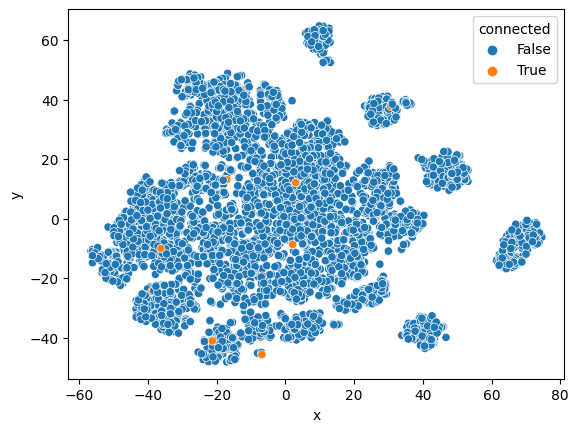

In [18]:
model = TSNE(n_components=2, perplexity = 50)
num = 5000
X_transformed = model.fit_transform(X_train_scaled[0:num])
dimred_plot(X_transformed, num)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

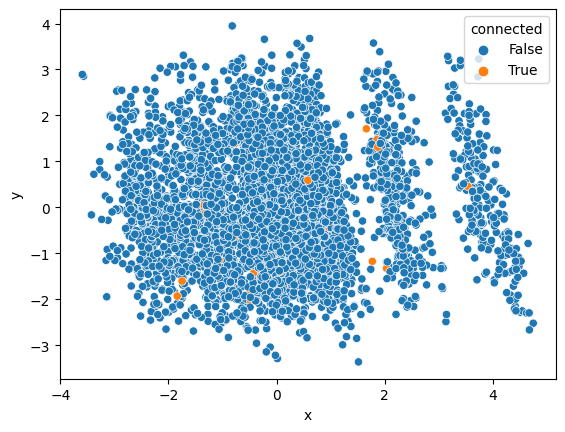

In [20]:
X_pca = PCA(n_components=2).fit_transform(X_train_scaled[0:num])
dimred_plot(X_pca, num)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarnin

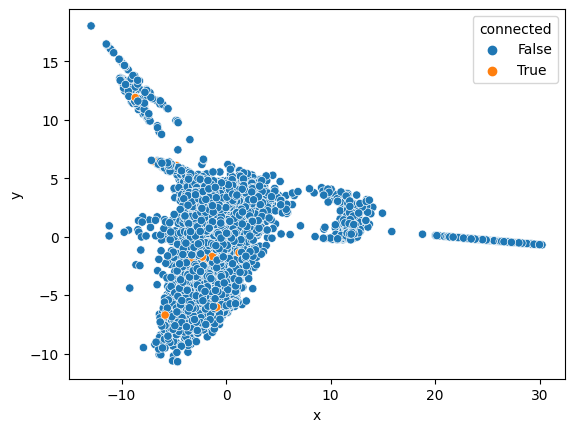

In [21]:
X_pca = Isomap(n_components=2).fit_transform(X_train_scaled[0:num])
dimred_plot(X_pca, num)